In [2]:
import pandas as pd

data = pd.read_csv("simulated_drug_trial_data.csv")

In [3]:
data.head()

,patient_id,group,pre_treatment_score,post_treatment_score,recovery_time,side_effects
0,1,new_drug,50.870471,29.875172,8.153114,No
1,2,placebo,47.009926,37.648323,14.706844,No
2,3,new_drug,50.917608,33.918692,7.622500,No
3,4,new_drug,30.124311,9.775300,13.157762,Yes
4,5,new_drug,47.803281,29.729849,9.239150,No


In [5]:
data.groupby('group')


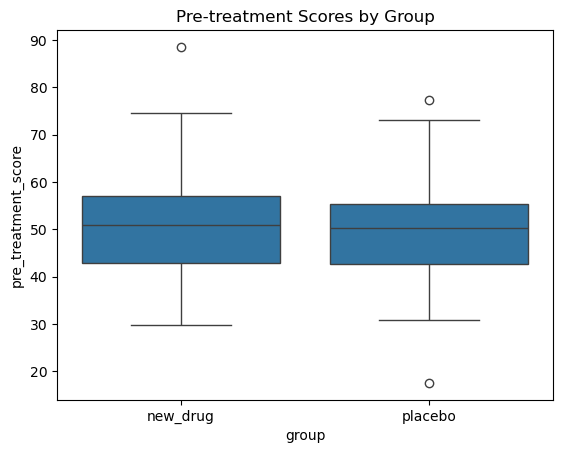

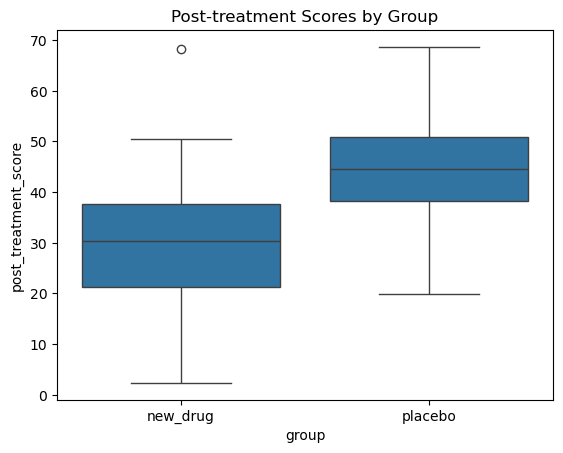

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-treatment scores
sns.boxplot(x = 'group', y='pre_treatment_score', data = data)
plt.title('Pre-treatment Scores by Group')
plt.show()

# Post-treatment scores
sns.boxplot(x = 'group', y = 'post_treatment_score',data = data)
plt.title('Post-treatment Scores by Group')
plt.show()





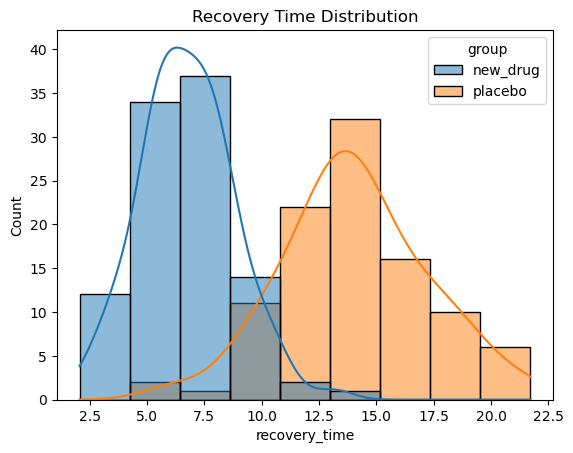

In [7]:
sns.histplot(data=data, x='recovery_time', hue='group', kde=True)
plt.title('Recovery Time Distribution')
plt.show()


Text(0.5, 1.0, 'Side Effects by Group')

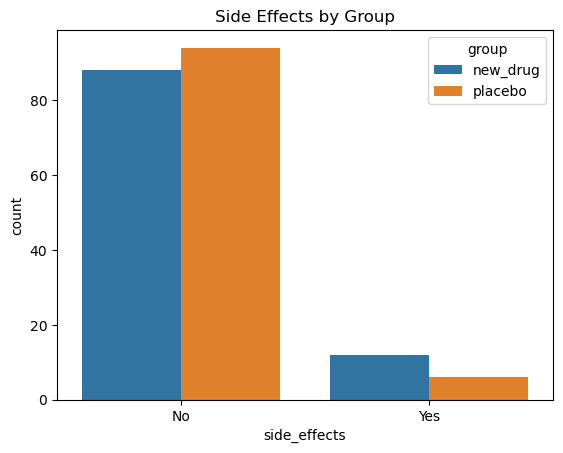

In [8]:
sns.countplot(x='side_effects', hue='group', data=data)
plt.title('Side Effects by Group')


In [9]:
from scipy.stats import ttest_ind
# Split the data into two groups
new_drug_group = data[data['group'] == 'new_drug']['recovery_time']
placebo_group = data[data['group'] == 'placebo']['recovery_time']

# Perform an independent t-test
t_stat, p_value = ttest_ind(new_drug_group, placebo_group)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -19.493261918835753, P-value: 6.066733792861212e-48


In [10]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['group'], data['side_effects'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, P-value: {p}")



Chi-Square Statistic: 1.5262515262515262, P-value: 0.2166758967420339


In [11]:
import numpy as np
# Compute the mean and standard error for both groups
mean_diff = np.mean(new_drug_group) - np.mean(placebo_group)
se_diff = np.sqrt(np.var(new_drug_group)/len(new_drug_group) + np.var(placebo_group)/len(placebo_group))

# 95% confidence interval
conf_interval = (mean_diff - 1.96 * se_diff, mean_diff + 1.96 * se_diff)
print(f"95% Confidence Interval: {conf_interval}")


95% Confidence Interval: (-8.04893105603818, -6.584909505937024)


In [12]:
# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.var(new_drug_group) + np.var(placebo_group)) / 2)

# Calculate Cohen's d
cohen_d = (np.mean(new_drug_group) - np.mean(placebo_group)) / pooled_std
print(f"Cohen's d: {cohen_d}")


Cohen's d: -2.770651603468883
